In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from torchvision import transforms

In [2]:
situations = []

In [10]:
import gym

env = gym.make('MsPacman-v0')
state = env.reset()

for _ in range(10000):
    state_prime, reward, done, info = env.step(env.action_space.sample())
    
    situations.append({
        'state': state,
        'state_prime': state_prime,
        'reward': reward,
        'done': done,
        'info': info
    })
    
    state = state_prime

SyntaxError: name 'state' is used prior to global declaration (3275567394.py, line 20)

In [11]:
len(situations)

10000

In [12]:
situations[0]['state']

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[228, 111, 111],
        [228, 111, 111],
        [228, 111, 111],
        ...,
        [228, 111, 111],
        [228, 111, 111],
        [228, 111, 111]],

       [[228, 111, 111],
        [228, 111, 111],
        [228, 111, 111],
        ...,
        [228, 111, 111],
        [228, 111, 111],
        [228, 111, 111]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

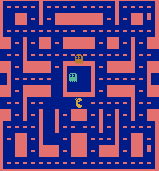

In [37]:
origin_rgb = situations[300]['state'][1:172, 1:160]
photo = transforms.ToPILImage()(origin_rgb)

photo

In [35]:
type(photo)

PIL.Image.Image

이미지를 171 X 159 X 3 에서 227 X 227 X 3 으로 변경해주어야 함

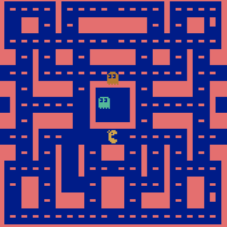

In [45]:
img_transform = transforms.Compose([
    transforms.Resize((227, 227))
])

after_photo = img_transform(photo)
after_photo

In [42]:
new_rgb = transforms.ToTensor()(after_photo)
print(new_rgb.shape)
new_rgb

torch.Size([3, 227, 227])


tensor([[[0.8941, 0.8941, 0.8941,  ..., 0.8941, 0.8941, 0.8941],
         [0.8941, 0.8941, 0.8941,  ..., 0.8941, 0.8941, 0.8941],
         [0.8941, 0.8941, 0.8941,  ..., 0.8941, 0.8941, 0.8941],
         ...,
         [0.8941, 0.8941, 0.8941,  ..., 0.8941, 0.8941, 0.8941],
         [0.8941, 0.8941, 0.8941,  ..., 0.8941, 0.8941, 0.8941],
         [0.8941, 0.8941, 0.8941,  ..., 0.8941, 0.8941, 0.8941]],

        [[0.4353, 0.4353, 0.4353,  ..., 0.4353, 0.4353, 0.4353],
         [0.4353, 0.4353, 0.4353,  ..., 0.4353, 0.4353, 0.4353],
         [0.4353, 0.4353, 0.4353,  ..., 0.4353, 0.4353, 0.4353],
         ...,
         [0.4353, 0.4353, 0.4353,  ..., 0.4353, 0.4353, 0.4353],
         [0.4353, 0.4353, 0.4353,  ..., 0.4353, 0.4353, 0.4353],
         [0.4353, 0.4353, 0.4353,  ..., 0.4353, 0.4353, 0.4353]],

        [[0.4353, 0.4353, 0.4353,  ..., 0.4353, 0.4353, 0.4353],
         [0.4353, 0.4353, 0.4353,  ..., 0.4353, 0.4353, 0.4353],
         [0.4353, 0.4353, 0.4353,  ..., 0.4353, 0.4353, 0.